In [106]:
# Karthick 24BAD055
# EXPERIMENT 3 - Multilinear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
#Load dataset
df = pd.read_csv("StudentsPerformance.csv")

print(df.head())
print(df.info())
print(df.describe())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ----

In [108]:
#Create Target value
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)
label_encoders = {}


Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='str')


In [109]:
#Encode Categorial values
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)
label_encoders = {}

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df.head()

Index(['gender', 'race/ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='str')


C:\Users\karth\AppData\Local\Temp\ipykernel_15728\96422063.py:6: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [110]:
#Select Features and target
df['final_exam_score'] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

X = df.drop(['final_exam_score','reading_score','writing_score',],axis=1)
y = df['final_exam_score']

In [111]:
#Handling missing values
print("Missing values:\n", X.isnull().sum())

X.fillna(X.mean(), inplace=True)

print("Missing values after filling:\n", X.isnull().sum())

Missing values:
 gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
dtype: int64
Missing values after filling:
 gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
dtype: int64


In [112]:
#Regression coefficient
feature_names = X.columns.tolist()

coeff_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": model.coef_
})

print(coeff_df)
print("Intercept:", model.intercept_)

                       Feature  Coefficient
0                       gender    -4.148067
1               race/ethnicity    -0.357248
2  parental_level_of_education    -0.264601
3                        lunch    -0.621235
4      test_preparation_course    -1.178561
5                   math_score    13.774047
Intercept: 67.7623551550166


In [113]:
#Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [114]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)

Training data size: (800, 6)
Testing data size: (200, 6)


In [115]:
#Train multilinear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [116]:
#Evalution metrices
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)

Mean Squared Error (MSE): 11.885534043497637
Root Mean Squared Error (RMSE): 3.4475402888867936
R2 Score: 0.944555094442599


Text(0.5, 1.0, 'Actual vs Predicted Values')

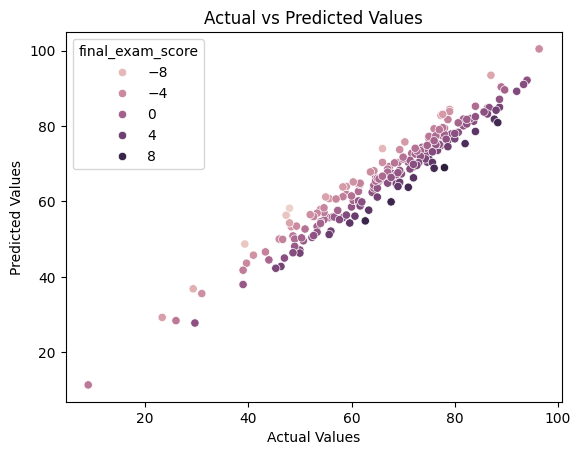

In [117]:
# Actual vs Predicted with Ideal Line
sns.scatterplot(x=y_test,y=y_pred,hue=y_test-y_pred)
plt.xlabel('Actual Values') 
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

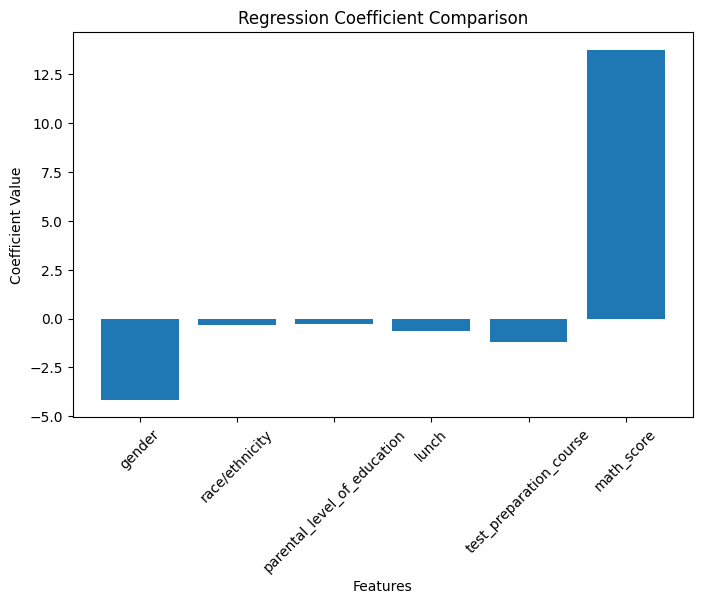

In [118]:
#coefficient magnitude comparison
plt.figure(figsize=(8,5))
plt.bar(coeff_df["Feature"], coeff_df["Coefficient"])
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Regression Coefficient Comparison")
plt.xticks(rotation=45)
plt.show()

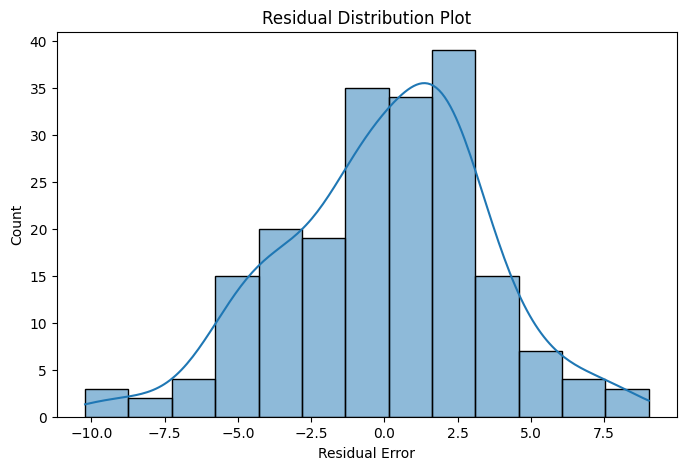

In [119]:
#Residual distribution plot

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(residuals, kde=True)
plt.xlabel("Residual Error")
plt.title("Residual Distribution Plot")
plt.show()


In [120]:
#optimization  Ridge regression 
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

ridge_pred = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

print("\n--- Ridge Regression ---")
print("MSE:", ridge_mse)
print("RMSE:", ridge_rmse)
print("R2 Score:", ridge_r2)


--- Ridge Regression ---
MSE: 11.901624860580977
RMSE: 3.4498731658687074
R2 Score: 0.9444800322846629


In [121]:
#optimization  Lasso regression
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)

print("Lasso R2 Score:", r2_score(y_test, lasso_pred))

Lasso R2 Score: 0.9442529531548502
